In [7]:
# !pip install ace

예찬이 코드리뷰 결과

 - 장점
연령대, 신용등급 분류 아주 좋았음
쓸만한 데이터가 많음

 - 단점
반쪽짜리라 바로 쓸 수 없음
비율 나오는건 좋은데 정확한 수치가 없어서
subplots(1, 2) 이런 형태로 같이 출력이 필요함
그리고 범주형변수 라벨링은 학습에 필요가 없음

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns

# font_path = '/Library/Fonts/Arial Unicode.ttf'      # mac 폰트 추가
font_path = 'C:\\Windows\\Fonts\\malgun.TTF'          # 한글 폰트를 적용하여 시각화
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# warnings 무시하기
import warnings
warnings.filterwarnings('ignore')

In [9]:
# 다시 파일 로드 및 전처리 진행

# 데이터 불러오기
df = pd.read_csv("./data/Bank Customer Churn Prediction.csv")

# age를 연령대 그룹화
df["age_group"] = pd.cut(df["age"], bins=[18, 40, 60, 80, 100], labels=["청년", "중년", "장년", '노년'])

# credit_score를 신용 등급으로 변환
df["credit_score_group"] = pd.cut(
    df["credit_score"], bins=[0, 250, 500, 750, 1000], labels=["브론즈", "실버", "골드", '플래티넘']
)

df.to_csv("./data/Transformed_Bank_Customer_Churn.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: './data/Bank Customer Churn Prediction.csv'

In [4]:
df = pd.read_csv("./data/Transformed_Bank_Customer_Churn.csv")

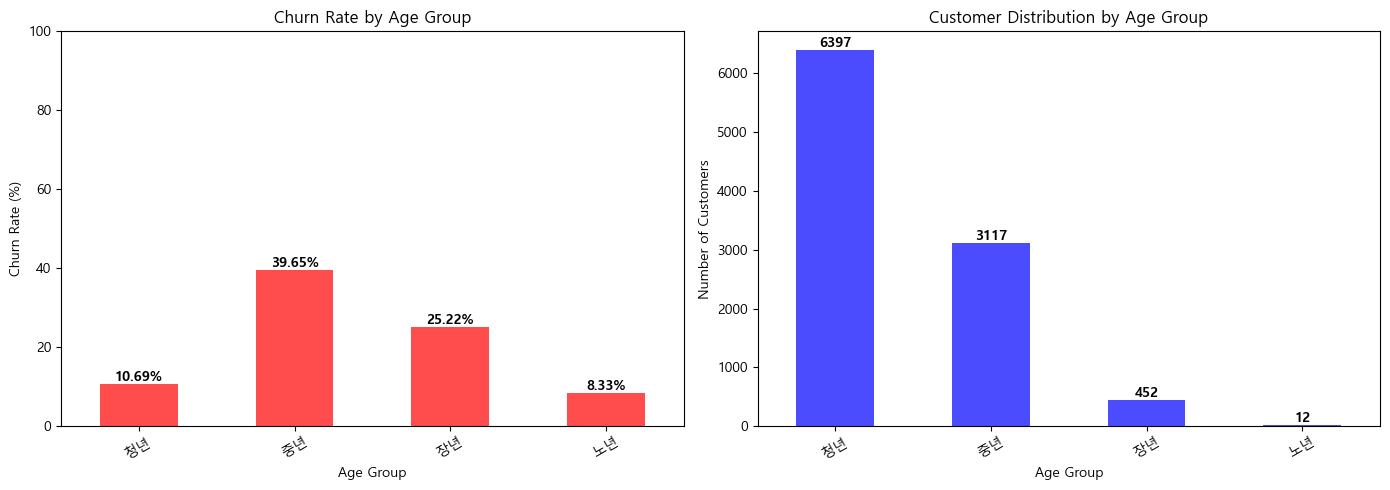

In [15]:
# 연령대 순서 지정
age_order = ["청년", "중년", "장년", "노년"]

# 연령대별 이탈률(%) 계산
churn_data_age = df.groupby('age_group')['churn'].mean() * 100

# 지정된 순서대로 정렬
churn_data_age = churn_data_age.reindex(age_order)

# 연령대별 고객 수(빈도) 계산
age_group_counts = df['age_group'].value_counts().reindex(age_order)

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 연령대별 이탈률(%)
ax1 = axes[0]
churn_data_age.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(age_order, rotation=30)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 연령대별 고객 수
ax2 = axes[1]
age_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(age_order, rotation=30)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


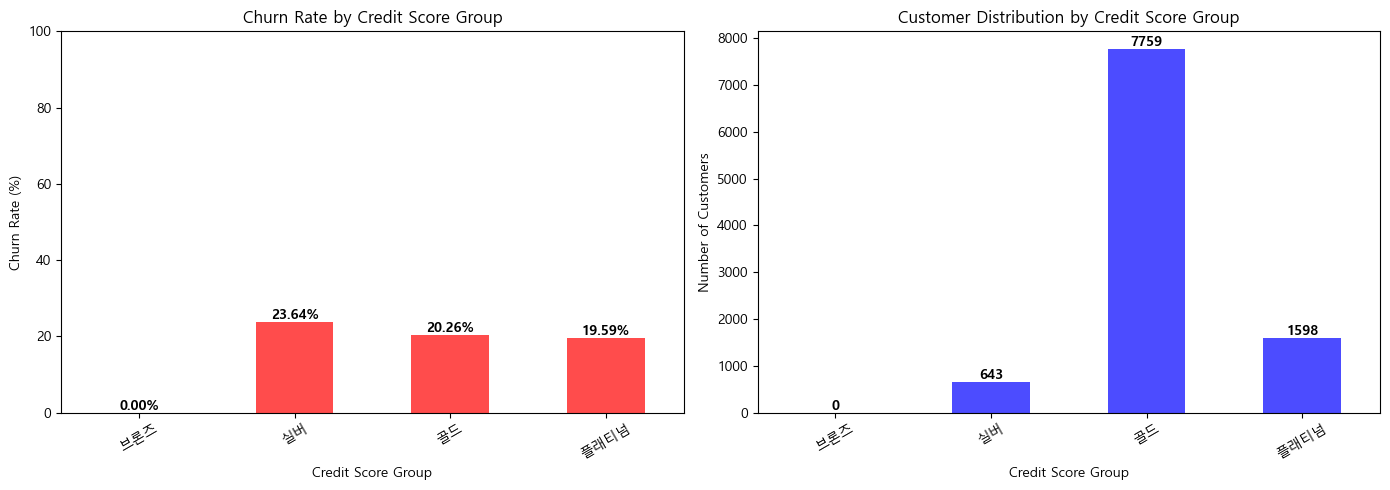

In [16]:
# 신용 점수 그룹 순서 지정
credit_order = ["브론즈", "실버", "골드", "플래티넘"]

# 신용 점수 그룹별 이탈률(%) 계산
churn_data_credit = df.groupby('credit_score_group')['churn'].mean() * 100
churn_data_credit = churn_data_credit.reindex(credit_order)

# 신용 점수 그룹별 고객 수(빈도) 계산
credit_group_counts = df['credit_score_group'].value_counts().reindex(credit_order)

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 신용 점수 그룹별 이탈률(%)
ax1 = axes[0]
churn_data_credit.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Credit Score Group")
ax1.set_xlabel("Credit Score Group")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(credit_order, rotation=30)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 신용 점수 그룹별 고객 수
ax2 = axes[1]
credit_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Credit Score Group")
ax2.set_xlabel("Credit Score Group")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(credit_order, rotation=30)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


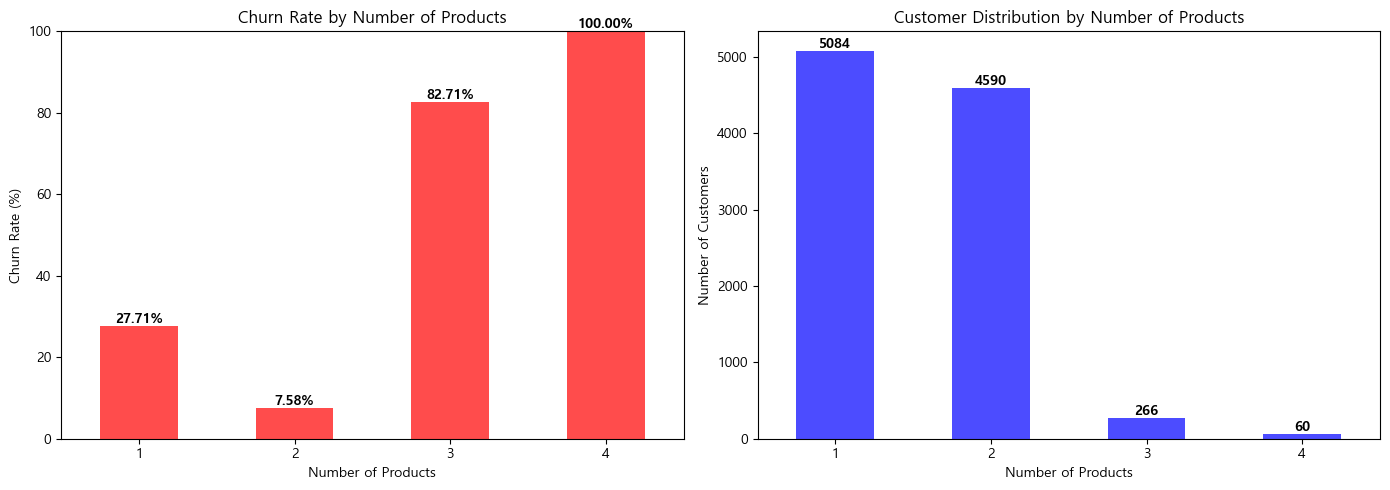

In [18]:
# 상품 개수별 이탈률(%) 계산
churn_data_product = df.groupby('products_number')['churn'].mean() * 100

# 상품 개수별 고객 수(빈도) 계산
product_group_counts = df['products_number'].value_counts().sort_index()

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 상품 개수별 이탈률(%)
ax1 = axes[0]
churn_data_product.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Number of Products")
ax1.set_xlabel("Number of Products")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(churn_data_product.index, rotation=0)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 상품 개수별 고객 수
ax2 = axes[1]
product_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Number of Products")
ax2.set_xlabel("Number of Products")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(product_group_counts.index, rotation=0)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


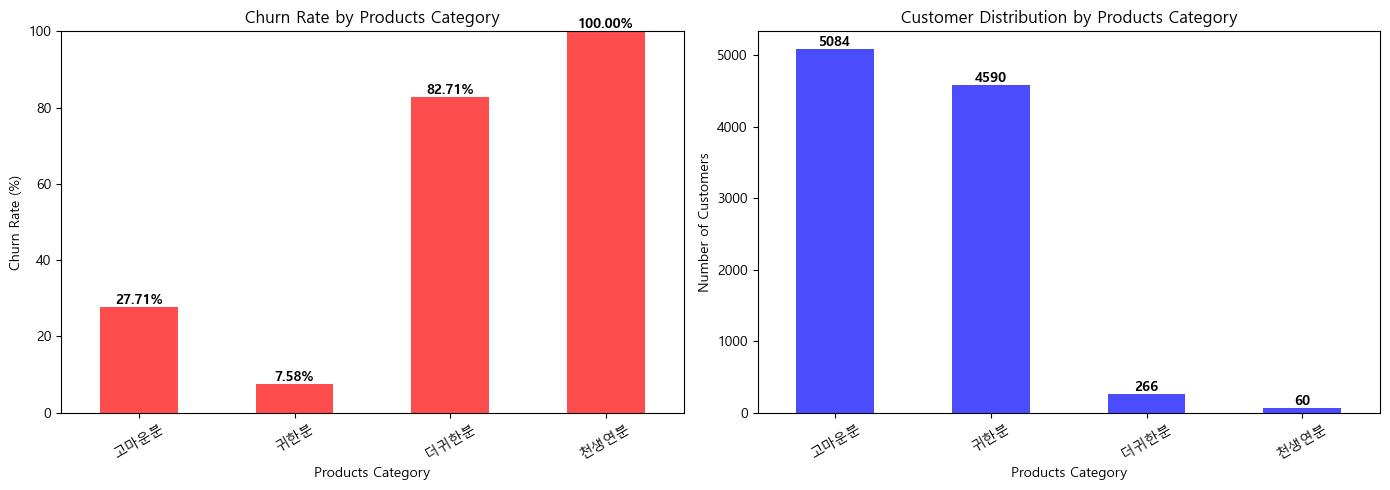

In [19]:
# 상품 카테고리 순서 지정
product_order = ['고마운분', '귀한분', '더귀한분', '천생연분']

# 상품 카테고리별 이탈률(%) 계산
churn_data_category = df.groupby('products_category')['churn'].mean() * 100
churn_data_category = churn_data_category.reindex(product_order)

# 상품 카테고리별 고객 수(빈도) 계산
category_group_counts = df['products_category'].value_counts().reindex(product_order)

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 상품 카테고리별 이탈률(%)
ax1 = axes[0]
churn_data_category.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Products Category")
ax1.set_xlabel("Products Category")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(product_order, rotation=30)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 상품 카테고리별 고객 수
ax2 = axes[1]
category_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Products Category")
ax2.set_xlabel("Products Category")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(product_order, rotation=30)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


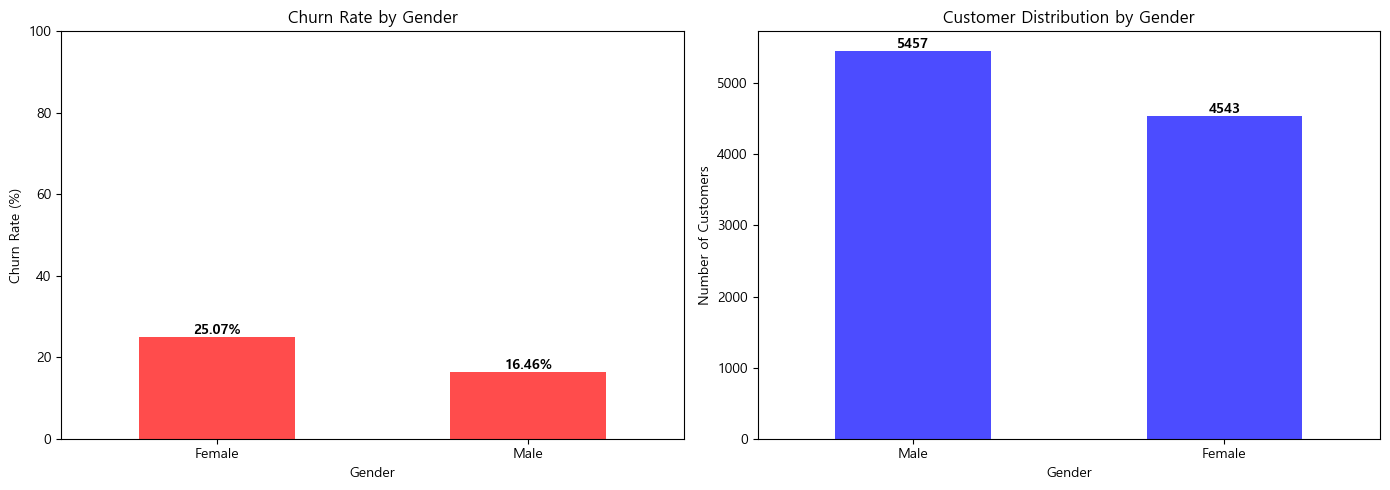

In [20]:
# 성별 이탈률(%) 계산
churn_data_gender = df.groupby('gender')['churn'].mean() * 100

# 성별 고객 수(빈도) 계산
gender_group_counts = df['gender'].value_counts()

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 성별 이탈률(%)
ax1 = axes[0]
churn_data_gender.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Gender")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(churn_data_gender.index, rotation=0)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 성별 고객 수
ax2 = axes[1]
gender_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Gender")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(gender_group_counts.index, rotation=0)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


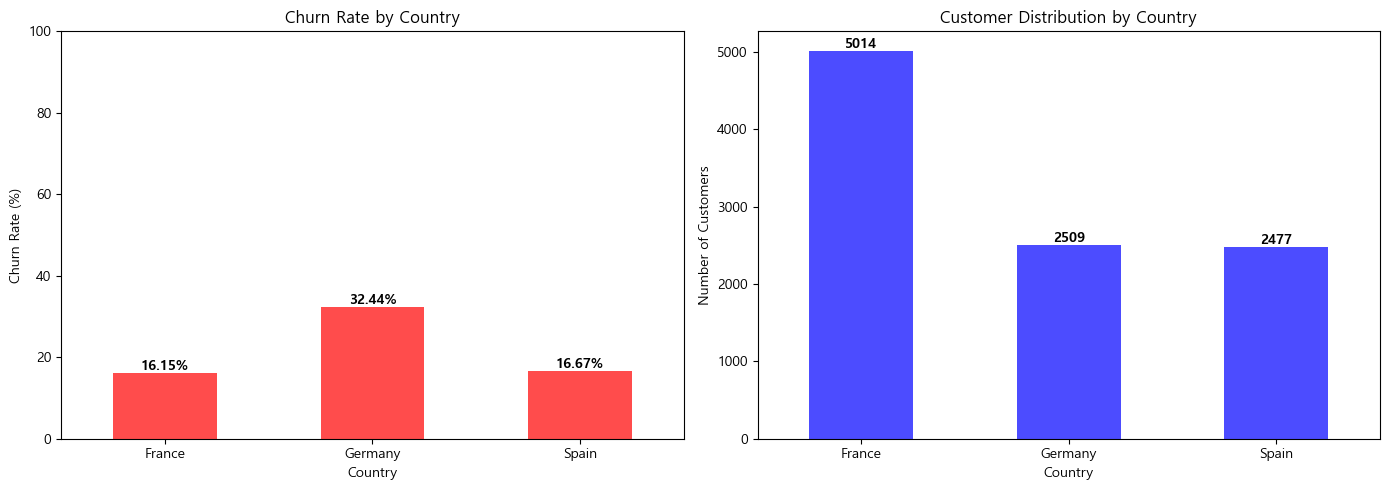

In [21]:
# 국가별 이탈률(%) 계산
churn_data_country = df.groupby('country')['churn'].mean() * 100

# 국가별 고객 수(빈도) 계산
country_group_counts = df['country'].value_counts()

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 국가별 이탈률(%)
ax1 = axes[0]
churn_data_country.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Country")
ax1.set_xlabel("Country")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(churn_data_country.index, rotation=0)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 국가별 고객 수
ax2 = axes[1]
country_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Country")
ax2.set_xlabel("Country")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(country_group_counts.index, rotation=0)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


---

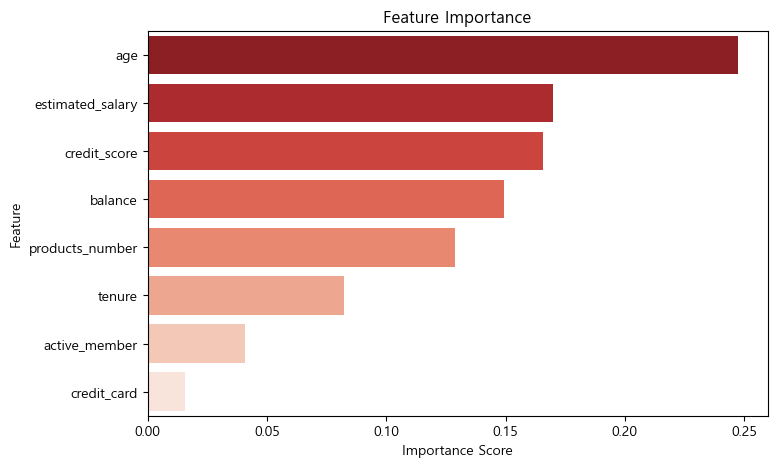

In [11]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 사용할 피처 선택 (customer_id 제거)
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 
            'credit_card', 'active_member', 'estimated_salary']

X = df[features]
y = df['churn']

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 특성 중요도 추출
feature_importances = model.feature_importances_

# 데이터프레임으로 변환 후 정렬
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 그래프 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Reds_r")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
